# Predicting Sale Price for Ames Iowa Housing Dataset 

### By: Eu Jin Lee 

## Problem Statement

As a realty firm seeking to expand our market around the Midwestern regions of America, specifically in the city of Ames, Iowa. We are interested in exploring the market trends and exploring the pricing of real estate in that region that ensure competitive prices.

## Executive Summary

## Contents 

- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#Data-Dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualizations](#Data-Visualizations)
- [The Centennial, Prairie and Sunshine State](#The-Centennial,-Prairie-and-Sunshine-State)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Data Import and Cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### Training Data

In [2]:
df = pd.read_csv('datasets/train.csv')
pd.set_option('display.max_columns', 100)
originale = df

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.shape

(2051, 81)

**NaN Check in columns of dataset.**

In [5]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
# Source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

In [6]:
missing_values_table(df)

Your selected dataframe has 81 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Pool QC,2042,99.6
Misc Feature,1986,96.8
Alley,1911,93.2
Fence,1651,80.5
Fireplace Qu,1000,48.8
Lot Frontage,330,16.1
Garage Yr Blt,114,5.6
Garage Cond,114,5.6
Garage Qual,114,5.6
Garage Finish,114,5.6


We are dropping the first 6 features from the table above due to the fact that they have a large portion of missing values, that if they were imputed with values it may very well skew our data in a major way. 

In [7]:
df = df.drop(columns=['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu','Lot Frontage'])

**Data type Check**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond  

First I convert nominal variables with no null values into dummies.

- Nominal variables with NaNs will be examined later: 'Mas Vnr Type','Garage Type','Misc Feature'
- 'PID' is listed as a nominal variable in the data dictionary, but has a strong negative correlation with SalePrice by number, possibly due to how the city is processing these ID numbers. So I am going to regard it as a discrete variable instead.

In [9]:
#Creating a new column in case I want to use the original neighborhood column later on
df['Neighborhood_dummies'] = df['Neighborhood']

In [10]:
# Dummifying all nominal variables with no null values
df = pd.get_dummies(df, columns=['MS SubClass',
                                     'MS Zoning',
                                     'Street',
                                     'Land Contour',
                                     'Condition 1',
                                     'Condition 2',
                                     'House Style',
                                     'Lot Config',
                                     'Bldg Type',
                                     'Neighborhood_dummies',
                                     'Roof Style',
                                     'Roof Matl',
                                     'Exterior 1st',
                                     'Exterior 2nd', 
                                     'Foundation', 
                                     'Heating', 
                                     'Central Air',
                                     'Sale Type'], 
                      drop_first=True)

In [11]:
# Dataframe now has over 200 variables
df.shape

(2051, 196)

**Continuous Variables Editing**

In [12]:
df[df['BsmtFin SF 1'].isnull()==True]

,Id,PID,Lot Area,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,...,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1327,1342,903230120,5940,IR1,AllPub,Gtl,BrkSide,4,7,1946,1950,None,0.0,TA,TA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [13]:
# Removes the one row with null value in 'BsmtFin SF 1'
for i in df[df['BsmtFin SF 1'].isnull()==True].loc[:,'Id']:
    df = df[df['Id']!=i]

In [14]:
df[df['Garage Area'].isnull()==True]

,Id,PID,Lot Area,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,...,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1712,2237,910201180,9060,Reg,AllPub,Gtl,IDOTRR,5,6,1923,1999,None,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,Ex,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [15]:
# Removes the one row with null value in 'Garage Area'
for i in df[df['Garage Area'].isnull()==True].loc[:,'Id']:
    df = df[df['Id']!=i]

**Discrete Variables Editing**

In [16]:
df[df['Bsmt Full Bath'].isnull()==True]

,Id,PID,Lot Area,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,...,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
616,1498,908154080,47007,IR1,AllPub,Gtl,Edwards,5,7,1959,1996,None,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,TA,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [17]:
# We have already removed one of the rows that is missing 'Bsmt Full Bath' and 'Bsmt Half Bath'
#Removes this row as well, which is missing both of these, to resolve both those vars.
for i in df[df['Bsmt Full Bath'].isnull()==True].loc[:,'Id']:
    df = df[df['Id']!=i]

In [18]:
# We have already removed the row that was causing an issue with 'Garage Cars':
df[df['Garage Cars'].isnull()==True]

,Id,PID,Lot Area,Lot Shape,Utilities,Land Slope,Neighborhood,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,...,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD


Month sold is a categorical variable. We will create a season column to represent these months. And dummify the seasons and the months.

In [19]:
#Creates variable for season of sale from month of sale variable
seasons = {
    'Spring':[3,4,5],
    'Summer':[6,7,8],
    'Fall':[9,10,11],
    'Winter':[12,1,2]
}

df['Season'] = df['Mo Sold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])

In [20]:
#Gets dummies for month and season of sale
df = pd.get_dummies(df, columns=['Season'],drop_first=True)
df = pd.get_dummies(df, columns=['Mo Sold'], drop_first=True)

**Ordinal Variables Editing**

First looking at variables without any missing values. 

In [21]:
#Lot Shape will be assigned numeric values according to irregularity (0,1,2,3)
df['Lot Shape'] = df['Lot Shape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [22]:
df['Utilities'].value_counts()

AllPub    2046
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
#This seems somewhat negligible, but it may as well be included
df['Utilities'] = df['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2})

In [24]:
df['Land Slope'].value_counts()

Gtl    1950
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [25]:
#Gtl is basically the reference, there is no flat.  So we will call this 0,1,2.
df['Land Slope'] = df['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':2})

In [26]:
df['Exter Qual'].value_counts()

TA    1244
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [27]:
df['Exter Cond'].value_counts()

TA    1775
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [28]:
df['Heating QC'].value_counts()

Ex    1064
TA     595
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [29]:
df['Kitchen Qual'].value_counts()

TA    1046
Gd     805
Ex     150
Fa      47
Name: Kitchen Qual, dtype: int64

In [30]:
#These four variables follow the same scale.  Notice the average condition is the majority in most cases. 
#The appropriate match here to me is -4, -1, 0, 1, 4.  The idea is that Excellent or Poor have a larger than proportional impact.
for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
    df[i] = df[i].map({'Ex':4,'Gd':1,'TA':0,'Fa':-1,'Po':-4})

In [31]:
df['Heating QC'] = df['Heating QC'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-2,'Po':-4})

In [32]:
df['Electrical'].value_counts()

SBrkr    1866
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [33]:
for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
    df[i+' 2'] = df[i].map({4:2,1:1,0:0,-1:-1,-4:-2})

In [34]:
df['Electrical'].value_counts()

SBrkr    1866
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [35]:
df['Electrical'] = df['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})

In [36]:
df['Electrical'].value_counts()

0.0    1866
1.0     139
2.0      35
3.0       7
1.5       1
Name: Electrical, dtype: int64

In [37]:
df['Functional'].value_counts()

Typ     1912
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [38]:
df['Functional'] = df['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})

In [39]:
df['Paved Drive'].value_counts()

Y    1858
N     151
P      39
Name: Paved Drive, dtype: int64

In [40]:
df['Paved Drive'] = df['Paved Drive'].map({'N':0,'P':1,'Y':2})

**Garage Data Imputation**

In [41]:
missing_garage_data = df[df['Garage Finish'].isnull()==True]

In [42]:
missing_garage_data[['Garage Area','Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Qual','Garage Cond']].head(10)

,Garage Area,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond
28,0.0,NaN,NaN,NaN,0.0,NaN,NaN
53,0.0,NaN,NaN,NaN,0.0,NaN,NaN
65,0.0,NaN,NaN,NaN,0.0,NaN,NaN
79,0.0,NaN,NaN,NaN,0.0,NaN,NaN
101,0.0,NaN,NaN,NaN,0.0,NaN,NaN
103,0.0,NaN,NaN,NaN,0.0,NaN,NaN
114,0.0,NaN,NaN,NaN,0.0,NaN,NaN
120,0.0,NaN,NaN,NaN,0.0,NaN,NaN
134,0.0,NaN,NaN,NaN,0.0,NaN,NaN
136,0.0,NaN,NaN,NaN,0.0,NaN,NaN


What we see here is that these NaNs just represent houses without garages. So we should be able to impute fairly easily.

In [43]:
df['Garage Type'] = df['Garage Type'].fillna('None')
df['Garage Finish'] = df['Garage Finish'].fillna('None')
df['Garage Qual'] = df['Garage Qual'].fillna('None')
df['Garage Cond'] = df['Garage Cond'].fillna('None')

#Nominal variable 'Garage Type' goes to dummies
df = pd.get_dummies(df, columns=['Garage Type'], drop_first=True)

df['Garage Finish'] = df['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})

df['Garage Qual'] = df['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
df['Garage Cond'] = df['Garage Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

#Here I will impute the year house built for year garage built NaNs:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])

**Basement Data Imputation**

In [44]:
#Now we look at the subgroup of Basement related variables with approximately 1995 non-nulls
missing_bsmt_data = df[df['Bsmt Exposure'].isnull()==True]
missing_bsmt_data[['Bsmt Exposure','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2','BsmtFin SF 1']].head(10)

,Bsmt Exposure,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,BsmtFin SF 1
12,NaN,NaN,NaN,NaN,NaN,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0


Again we can see that these are just non-basement homes. Same type of thing should apply as with garages.

In [45]:
for i in ['Bsmt Exposure','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2']:
    df[i] = df[i].fillna('None')

#Bsmt Qual and Bsmt Cond mimic the early variables on this scale.  I've weighted this and the garage version differently due to perceived impact.
#A basement or garage is considered an extra amenity relative to 0.  A functional heating system is regarded as state 0.
df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})

df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})

**Fireplaces, Fences**

In [46]:
# #Looking at Fireplace, Pool and Fence quality next:
# df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
# df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})

# df['Fence'] = df['Fence'].fillna('None')
# df['Fence'] = df['Fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})

**Nominal Variables, Editing**

In [47]:
# #Convert existing Alley column into a dummy for Yes/No on Alley, and dummies for gravel alley and paved alley
# df['Alley'] = df['Alley'].fillna(0)
# df['Alley Grvl'] = df['Alley'].map(lambda x: 1 if x=='Grvl' else 0)
# df['Alley Pave'] = df['Alley'].map(lambda x: 1 if x=='Pave' else 0)
# df['Alley'] = df['Alley'].map(lambda x: 1 if x!=0 else 0)

#Miscellaneous dummy creation/imputation for nominal variables:
# df = pd.get_dummies(df, columns=['Misc Feature'])

df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df = pd.get_dummies(df, columns=['Mas Vnr Type'])
df.drop('Mas Vnr Type_None',axis=1,inplace=True)

df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [48]:
#dropping neighborhood because no longer needed
df.drop('Neighborhood',axis=1,inplace=True)

In [49]:
#confirm no more missing values
missing_values_table(df)

Your selected dataframe has 218 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [51]:
#Drop all features that have no predictive value because they do not apply to any houses in the training set
df.drop(['MS SubClass_150',
           'MS Zoning_C (all)',
           'Condition 2_Feedr',
           'Condition 2_RRAe',
           'Condition 2_RRAn',
           'Condition 2_RRNn',
           'Neighborhood_dummies_GrnHill',   
           'Neighborhood_dummies_Landmrk',
           'Exterior 1st_CBlock',
           'Exterior 1st_ImStucc',
           'Exterior 1st_Stone',
           'Exterior 2nd_Stone',
           'Heating_Wall',
           'Roof Matl_CompShg',
           'Roof Matl_Membran'],
           axis=1,inplace=True)

In [52]:
df.shape

(2048, 203)

## EDA 

### Correlation Map

In [ ]:
# filter to be the top and bottom five 
df.corr()[['SalePrice']] # make var & mess with it 

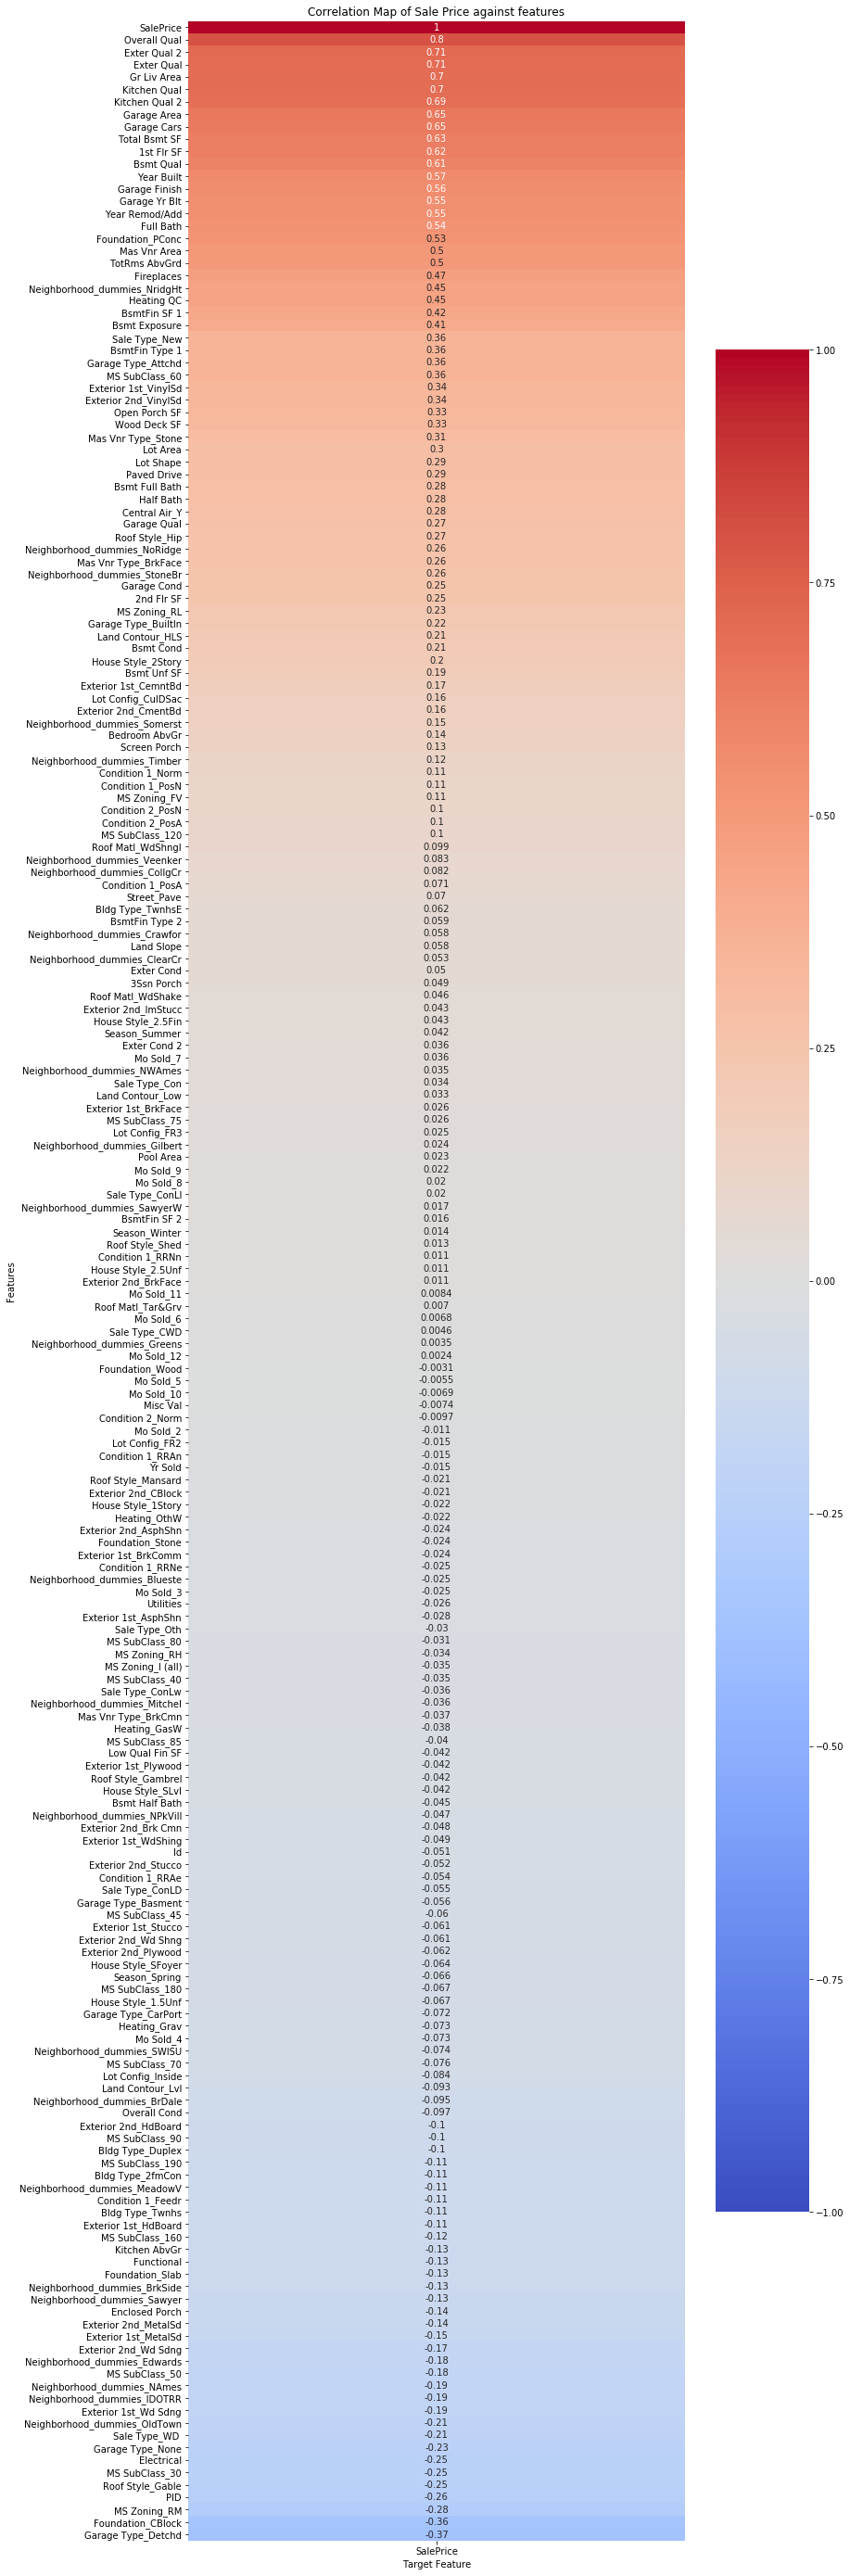

In [53]:
plt.figure(figsize=(12,50))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice',ascending=False), 
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1);
plt.title('Correlation Map of Sale Price against features')
plt.xlabel('Target Feature')
plt.ylabel('Features');

In [54]:
# saving cleaned dataset
df.to_csv('datasets/train_cleaned_by_mr_clean.csv',index=False)

### Testing Data

In [55]:
#Import test data
test = pd.read_csv('datasets/test.csv')

#Check size of test set.  We see there are 879 houses in the test set.
test.shape

(878, 80)

In [56]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [57]:
def apply_dataframe_changes(df):
        
        df['Neighborhood_dummies'] = df['Neighborhood']
    
        df.drop(columns=['Pool QC',
                         'Misc Feature',
                         'Alley',
                         'Fence',
                         'Fireplace Qu',
                         'Lot Frontage'
                        ], inplace=True)
        
        df = pd.get_dummies(df, columns=['MS SubClass',
                                        'MS Zoning',
                                        'Street',
                                        'Land Contour',
                                        'Condition 1',
                                        'Condition 2',
                                        'House Style',
                                        'Lot Config',
                                        'Bldg Type',
                                        'Neighborhood_dummies',
                                        'Roof Style',
                                        'Roof Matl',
                                        'Exterior 1st',
                                        'Exterior 2nd', 
                                        'Foundation', 
                                        'Heating', 
                                        'Central Air',
                                        'Sale Type'], 
                        drop_first=True)
        
        for i in df[df['BsmtFin SF 1'].isnull()==True].loc[:,'Id']:
            df = df[df['Id']!=i]
        for i in df[df['Garage Area'].isnull()==True].loc[:,'Id']:
            df = df[df['Id']!=i]
        for i in df[df['Bsmt Full Bath'].isnull()==True].loc[:,'Id']:
            df = df[df['Id']!=i]
        
        seasons = {'Spring':[3,4,5],'Summer':[6,7,8],'Fall':[9,10,11],'Winter':[12,1,2]}
        df['Season'] = df['Mo Sold'].map(lambda x: [i for i in seasons if x in seasons[i]][0])
        df = pd.get_dummies(df, columns=['Season'],drop_first=True)
        df = pd.get_dummies(df, columns=['Mo Sold'], drop_first=True)

        df['Lot Shape'] = df['Lot Shape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
        df['Utilities'] = df['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})
        df['Land Slope'] = df['Land Slope'].map({'Gtl':0,'Mod':1,'Sev':2})

        for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
            df[i] = df[i].map({'Ex':4,'Gd':1,'TA':0,'Fa':-1,'Po':-4})
        df['Heating QC'] = df['Heating QC'].map({'Ex':2,'Gd':1,'TA':0,'Fa':-2,'Po':-4})
        for i in ['Exter Qual','Exter Cond','Kitchen Qual']:
            df[i+' 2'] = df[i].map({4:2,1:1,0:0,-1:-1,-4:-2})
        df['Electrical'] = df['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})
        df['Functional'] = df['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
        df['Paved Drive'] = df['Paved Drive'].map({'N':0,'P':1,'Y':2})

        df['Garage Type'] = df['Garage Type'].fillna('None')
        df['Garage Finish'] = df['Garage Finish'].fillna('None')
        df['Garage Qual'] = df['Garage Qual'].fillna('None')
        df['Garage Cond'] = df['Garage Cond'].fillna('None')
        df = pd.get_dummies(df, columns=['Garage Type'], drop_first=True)
        df['Garage Finish'] = df['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
        df['Garage Qual'] = df['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
        df['Garage Cond'] = df['Garage Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
        df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])

        for i in ['Bsmt Exposure','Bsmt Qual','Bsmt Cond','BsmtFin Type 1','BsmtFin Type 2']:
            df[i] = df[i].fillna('None')
        df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
        df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2.5,'Fa':2,'Po':1.5,'None':0})
        df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
        df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ':4,'ALQ':3.5,'BLQ':3,'Rec':2.5,'LwQ':2,'Unf':1.5,'None':0})
        df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0,'None':0})
        
        
        df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
        df = pd.get_dummies(df, columns=['Mas Vnr Type'])
        df.drop('Mas Vnr Type_None',axis=1,inplace=True)
        df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)
        
#         neighborhood_means = df.groupby('Neighborhood')['Lot Frontage'].mean()
#         neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))
#         df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Neighborhood'])
#         df['Lot Frontage'] = df['Lot Frontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x) 
        df.drop('Neighborhood',axis=1,inplace=True) 
        
        df.drop('Exterior 1st_PreCast',axis=1,inplace=True)
        df.drop('Exterior 2nd_Other',axis=1,inplace=True)
        df.drop('Exterior 2nd_PreCast',axis=1,inplace=True)
        df.drop('Sale Type_VWD',axis=1,inplace=True)
        df.drop('Mas Vnr Type_CBlock',axis=1,inplace=True)
        
        df['Electrical'] = df['Electrical'].fillna(0)

        return df

In [58]:
#Applies changes to test set
test = apply_dataframe_changes(test)

In [59]:
#Checks for null values
missing_values_table(test)

Your selected dataframe has 203 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [60]:
#Saves processed test data
test.to_csv('datasets/test_cleaned_by_mr_clean.csv', index=False)